In [3]:
from html.parser import HTMLParser
import requests
import pandas as pd
import os
from datetime import datetime

class MLStripper(HTMLParser):
    def __init__(self):
        super().__init__()
        self.reset()
        self.strict = False
        self.convert_charrefs = True
        self.text = []

    def handle_data(self, d):
        self.text.append(d)

    def get_data(self):
        return ''.join(self.text)

def strip_tags(html):
    s = MLStripper()
    s.feed(html)
    return s.get_data()

def format_date(timestamp):
    return datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d %H:%M:%S')

def fetch_answers(question_id, api_key):
    params = {
        'site': 'stackoverflow',
        'order': 'desc',
        'sort': 'votes',
        'filter': '!*Mg4PjfgUqW7Zys1',
        'key': api_key
    }
    try:
        response = requests.get(f'https://api.stackexchange.com/2.3/questions/{question_id}/answers', params=params)
        response.raise_for_status()
        data = response.json()
        return data['items']
    except requests.exceptions.HTTPError as err:
        print("HTTP Error:", err)
        print(response.text)
        return []

def fetch_questions_and_answers(keyword, save_directory, api_key):
    all_data = []
    params = {
        'site': 'stackoverflow',
        'q': keyword,
        'sort': 'votes',
        'order': 'desc',
        'pagesize': 100,
        'filter': '!*Mg4PjfgUqW7Zys1',
        'key': api_key
    }
    page = 1

    try:
        while True:
            params['page'] = page
            response = requests.get('https://api.stackexchange.com/2.3/search/advanced', params=params)
            response.raise_for_status()
            data = response.json()

            if 'items' in data and data['items']:
                questions = data['items']

                for question in questions:
                    question_id = question['question_id']
                    answers = fetch_answers(question_id, api_key)
                    answer_texts = "----------\n".join([strip_tags(answer.get('body', '')) for answer in answers])

                    all_data.append({
                        "Question Title": question['title'],
                        "Question Body": strip_tags(question.get('body', '')),
                        "Question Upvote": question['score'],
                        "Question View Count": question['view_count'],
                        "Question Creation Date": format_date(question['creation_date']),
                        "Question Last Activity Date": format_date(question['last_activity_date']),
                        "Answers": answer_texts,
                        "Number of Answers": len(answers)
                    })

                if not data.get('has_more', False):
                    break
                page += 1
            else:
                break
    except requests.exceptions.HTTPError as err:
        print("HTTP Error:", err)
        print(response.text)
    except requests.exceptions.RequestException as e:
        print("Request failed:", e)

    if all_data:
        df = pd.DataFrame(all_data)
        df.index += 1  # Adjust index to start from 1
        file_name = f"{keyword}.csv"  # File name based on keyword
        df.to_csv(os.path.join(save_directory, file_name), index_label='Index')
        print(f"Exported to {os.path.join(save_directory, file_name)}")
    else:
        print(f"No questions found for keyword: {keyword}.")

def main(api_key, excel_path, save_directory):
    keywords_df = pd.read_excel(excel_path)  # Assume keywords are in the first column
    keywords = keywords_df.iloc[:, 0].unique()  # Read keywords from the first column

    for keyword in keywords:
        print(f"Fetching data for: {keyword}")
        fetch_questions_and_answers(keyword, save_directory, api_key)

# Usage examplea
current_directory = os.getcwd()
excel_path = 'Gov_keywords.xlsx'
api_key = 'yprC8v2G*mB95lnXIunBeg(('
main(api_key, excel_path, current_directory)


Fetching data for: Australia Digital Transformation
Exported to /Users/sinaroman/Australia Digital Transformation.csv
Fetching data for: Australia Government 
Exported to /Users/sinaroman/Australia Government .csv
Fetching data for: Australia Digital Identity 
Exported to /Users/sinaroman/Australia Digital Identity .csv
Fetching data for: Parliament of Australia
Exported to /Users/sinaroman/Parliament of Australia.csv
Fetching data for: Centrelink
Exported to /Users/sinaroman/Centrelink.csv
Fetching data for: Australian Medicare 
Exported to /Users/sinaroman/Australian Medicare .csv
Fetching data for: Service New South Wales
Exported to /Users/sinaroman/Service New South Wales.csv
Fetching data for: MyGov Australia
No questions found for keyword: MyGov Australia.
Fetching data for: JobSeeker Australia
Exported to /Users/sinaroman/JobSeeker Australia.csv
Fetching data for:  NDIS Australia
No questions found for keyword:  NDIS Australia.
Fetching data for: Home Affairs Australia
Exported

No questions found for keyword: Telehealth Services Australia.
Fetching data for: Australia Covid 19
Exported to /Users/sinaroman/Australia Covid 19.csv
Fetching data for: Australian Government Travel Advice
No questions found for keyword: Australian Government Travel Advice.
Fetching data for: Australian National Security
Exported to /Users/sinaroman/Australian National Security.csv
Fetching data for: Australian Conservation Programs
No questions found for keyword: Australian Conservation Programs.
Fetching data for: Australian Government Procurement
Exported to /Users/sinaroman/Australian Government Procurement.csv
Fetching data for: Australia's Foreign Aid
Exported to /Users/sinaroman/Australia's Foreign Aid.csv
Fetching data for: Australian Human Rights Commission
No questions found for keyword: Australian Human Rights Commission.
Fetching data for: Australian Workforce Statistics
No questions found for keyword: Australian Workforce Statistics.
Fetching data for: Australian Governm

No questions found for keyword: Australian Roads and Infrastructure.
Fetching data for: Australian Immigration Reform
No questions found for keyword: Australian Immigration Reform.
Fetching data for: Skilled Migration Australia
No questions found for keyword: Skilled Migration Australia.
Fetching data for: Student Visas Australia
Exported to /Users/sinaroman/Student Visas Australia.csv
Fetching data for: Australian Refugee Policy
No questions found for keyword: Australian Refugee Policy.
Fetching data for: Australian Visa Application Process
No questions found for keyword: Australian Visa Application Process.
Fetching data for: Australian Citizenship Test
No questions found for keyword: Australian Citizenship Test.
Fetching data for: Australian Diplomatic Missions
No questions found for keyword: Australian Diplomatic Missions.
Fetching data for: Australia in the Asia-Pacific
Exported to /Users/sinaroman/Australia in the Asia-Pacific.csv
Fetching data for: Australia Global Trade Agreeme

Data preview:
   Index                                     Question Title  \
0      1   NameError: name &#39;request&#39; is not defined   
1      2      How to call audio plugins from within Python?   
2      3  How to strip Objective-C symbols from OS X bin...   
3      4  In UTF-16, UTF-16BE, UTF-16LE, is the endian o...   
4      5               Django Ajax Upload Outside of a Form   

                                       Question Body  Question Upvote  \
0  I got this Python Code, and somehow I get the ...               74   
1  I've noticed that some open source DAWs such a...               14   
2  OK, I know there have been other posts about h...               12   
3  UTF-16 is a two-byte character encoding.  Exch...               12   
4  I am trying to use Valum's Ajax Upload to do f...               11   

   Question View Count Question Creation Date Question Last Activity Date  \
0               140942    2017-01-06 01:25:04         2021-01-15 00:00:43   
1             

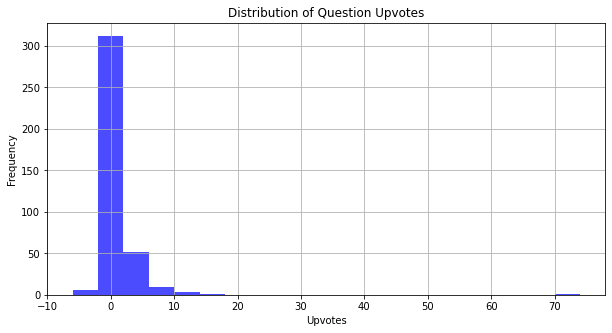

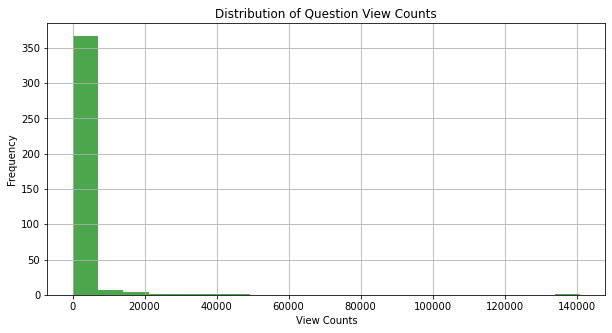

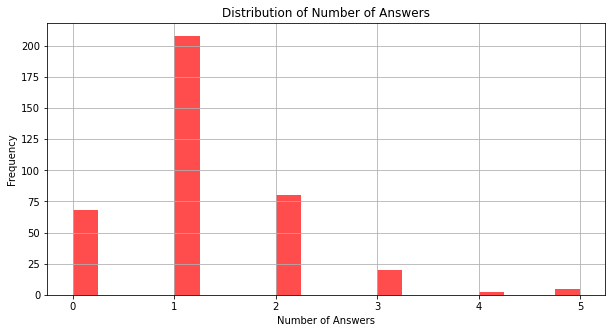

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'AUS POST.csv' is directly in the same directory as your notebook
file_path = 'AUS POST.csv'
try:
    data = pd.read_csv(file_path)

    # Display the first few rows of the dataframe
    print("Data preview:")
    print(data.head())

    # Print summary statistics for numerical columns
    print("\nSummary statistics:")
    print(data.describe())

    # Check for missing values
    print("\nMissing values:")
    print(data.isnull().sum())

    # Define a function to plot some initial charts
    def plot_data():
        # Plotting distribution of Question Upvotes (assuming this column exists)
        if 'Question Upvote' in data.columns:
            plt.figure(figsize=(10, 5))
            plt.hist(data['Question Upvote'].dropna(), bins=20, color='blue', alpha=0.7)
            plt.title('Distribution of Question Upvotes')
            plt.xlabel('Upvotes')
            plt.ylabel('Frequency')
            plt.grid(True)
            plt.show()

        # Plotting distribution of View Counts (assuming this column exists)
        if 'Question View Count' in data.columns:
            plt.figure(figsize=(10, 5))
            plt.hist(data['Question View Count'].dropna(), bins=20, color='green', alpha=0.7)
            plt.title('Distribution of Question View Counts')
            plt.xlabel('View Counts')
            plt.ylabel('Frequency')
            plt.grid(True)
            plt.show()

        # Plotting distribution of Number of Answers (assuming this column exists)
        if 'Number of Answers' in data.columns:
            plt.figure(figsize=(10, 5))
            plt.hist(data['Number of Answers'].dropna(), bins=20, color='red', alpha=0.7)
            plt.title('Distribution of Number of Answers')
            plt.xlabel('Number of Answers')
            plt.ylabel('Frequency')
            plt.grid(True)
            plt.show()

    plot_data()

except FileNotFoundError:
    print("File not found. Please check the filename and path.")
except Exception as e:
    print(f"An error occurred: {e}")
